In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

df = load_breast_cancer()
# print(df)

dataset = pd.DataFrame(df.data, columns = df.feature_names)
# dataset.head()


In [3]:
dataset['Target'] = df.target
# dataset.head(10)

In [4]:
#Checking is the dataset is balanced:

dataset['Target'].value_counts()

#The dataset is pretty balanced as the difference between true and false is not that much

,count
Target,
1,357
0,212


In [5]:
#Train test split:

x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train = train_test_split(x,y,train_size = 80, random_state = 42)

#Defining params for the Model. C and max_iter are the most imp.

params = {'C': [1,5,10], 'max_iter' : [100,150]}

#import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg1 = LogisticRegression(C=100, max_iter=100)
model = GridSearchCV(log_reg1,param_grid=params, scoring = 'f1', cv=5)

model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(C=100),
             param_grid={'C': [1, 5, 10], 'max_iter': [100, 150]},
             scoring='f1')

In [6]:
model.best_params_

{'C': 10, 'max_iter': 150}

In [7]:
print(model.best_score_)

0.962524824438818


In [8]:
y_pred = model.predict(x_test)
print(y_pred)

[0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0
 1 1 1 1 0 1]


In [9]:
#Model Evaluation:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test,y_pred))

[[26  3]
 [ 3 48]]


In [10]:
print(accuracy_score(y_test, y_pred))

0.925


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.94      0.94      0.94        51

    accuracy                           0.93        80
   macro avg       0.92      0.92      0.92        80
weighted avg       0.93      0.93      0.93        80



### Visualizing Model Evaluation

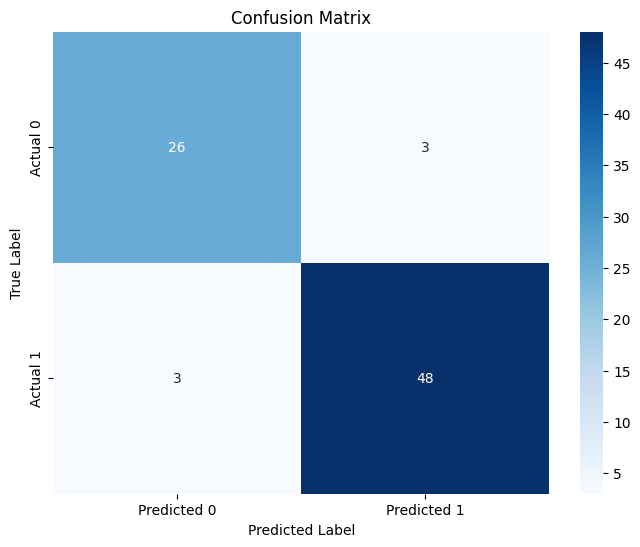

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

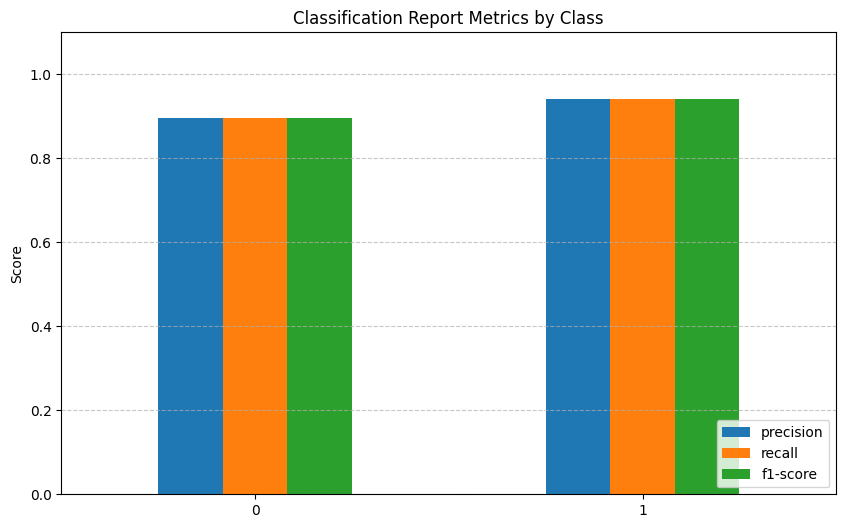

In [13]:
import pandas as pd

# Plot Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Exclude 'accuracy', 'macro avg', and 'weighted avg' for the bar plot
metrics_to_plot = df_report.loc[['0', '1'], ['precision', 'recall', 'f1-score']]

metrics_to_plot.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics by Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.ylim(0, 1.1) # Set y-axis limit to 0-1.1 for scores
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()